In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [92]:
andamentoVaccinazioni = pd.read_csv("https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/somministrazioni-vaccini-latest.csv")
andamentoVaccinazioni

,data_somministrazione,fornitore,area,fascia_anagrafica,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,2020-12-27,Pfizer/BioNTech,ABR,20-29,1,1,2,0,0,0,ITF,ITF1,13,Abruzzo
1,2020-12-27,Pfizer/BioNTech,ABR,30-39,1,4,5,0,0,0,ITF,ITF1,13,Abruzzo
2,2020-12-27,Pfizer/BioNTech,ABR,40-49,1,8,9,0,0,0,ITF,ITF1,13,Abruzzo
3,2020-12-27,Pfizer/BioNTech,ABR,50-59,7,6,13,0,0,0,ITF,ITF1,13,Abruzzo
4,2020-12-27,Pfizer/BioNTech,ABR,60-69,12,4,16,0,0,0,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159510,2021-12-08,Pfizer/BioNTech,VDA,50-59,3,3,1,0,0,5,ITC,ITC2,2,Valle d'Aosta / Vallée d'Aoste
159511,2021-12-08,Pfizer/BioNTech,VDA,60-69,3,3,0,1,0,5,ITC,ITC2,2,Valle d'Aosta / Vallée d'Aoste
159512,2021-12-08,Pfizer/BioNTech,VDA,70-79,4,6,0,0,0,10,ITC,ITC2,2,Valle d'Aosta / Vallée d'Aoste
159513,2021-12-08,Pfizer/BioNTech,VDA,80-89,0,1,0,0,0,1,ITC,ITC2,2,Valle d'Aosta / Vallée d'Aoste


In [93]:
popolazioneVaccinabile = pd.read_csv("https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/platea.csv")
popolazioneVaccinabile

,area,nome_area,fascia_anagrafica,totale_popolazione
0,ABR,Abruzzo,12-19,94727
1,ABR,Abruzzo,20-29,125230
2,ABR,Abruzzo,30-39,146965
3,ABR,Abruzzo,40-49,187162
4,ABR,Abruzzo,50-59,208686
...,...,...,...,...
163,VEN,Veneto,40-49,715790
164,VEN,Veneto,50-59,806474
165,VEN,Veneto,60-69,610635
166,VEN,Veneto,70-79,494721


Il primo grafico deve visualizzare, per ogni regione, il numero di vaccinati (prima dose) e il numero totale di abitanti di quella regione.

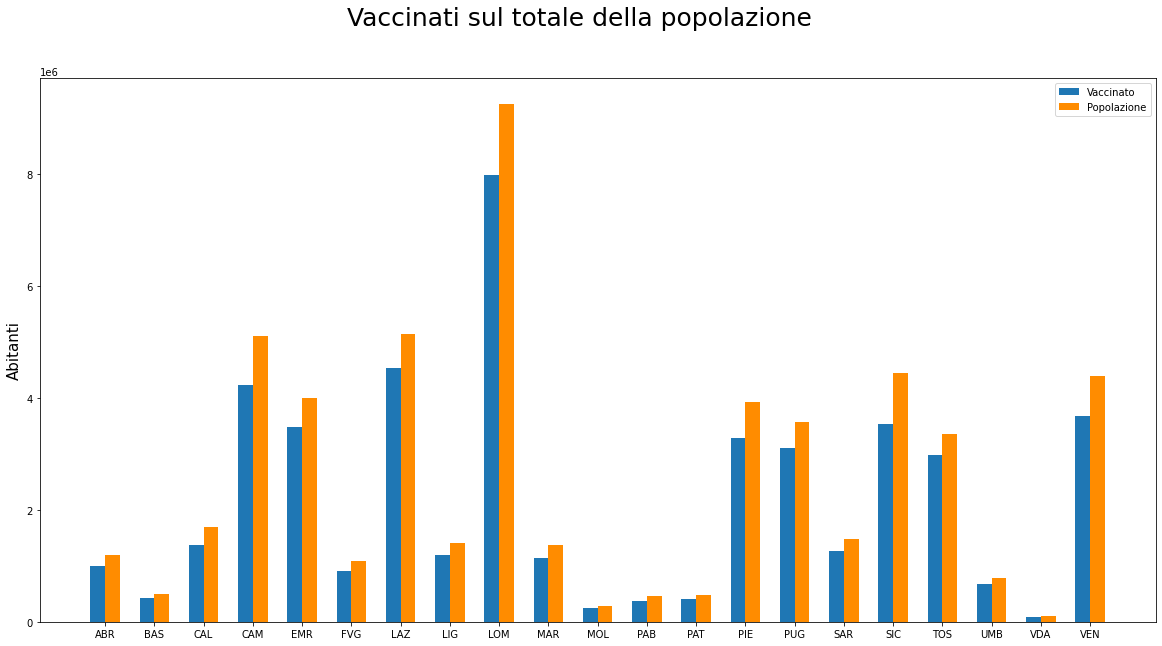

In [119]:
df = andamentoVaccinazioni.groupby("area")["prima_dose"].sum()
df1 = popolazioneVaccinabile.groupby("nome_area")["totale_popolazione"].sum()
xpos = np.arange(len(df.index))
ypos = np.arange(len(df.index))

fig = plt.figure(figsize=(20,10))
ax = plt.axes()
ax.bar(xpos, df.values, label = "Vaccinato", width = 0.3)
ax.bar(xpos + 0.3, df1.values, label = "Popolazione", width = 0.3, color = "darkorange")


ax.set_ylabel("Abitanti", fontsize = 15)
fig.suptitle("Vaccinati sul totale della popolazione", fontsize = 25)
plt.xticks(xpos + 0.3/2, df.index)
ax.legend(loc=0)
plt.show()

Il secondo deve contenere le percentuali di vaccinazioni (prima dose) sul totale della popolazione. 

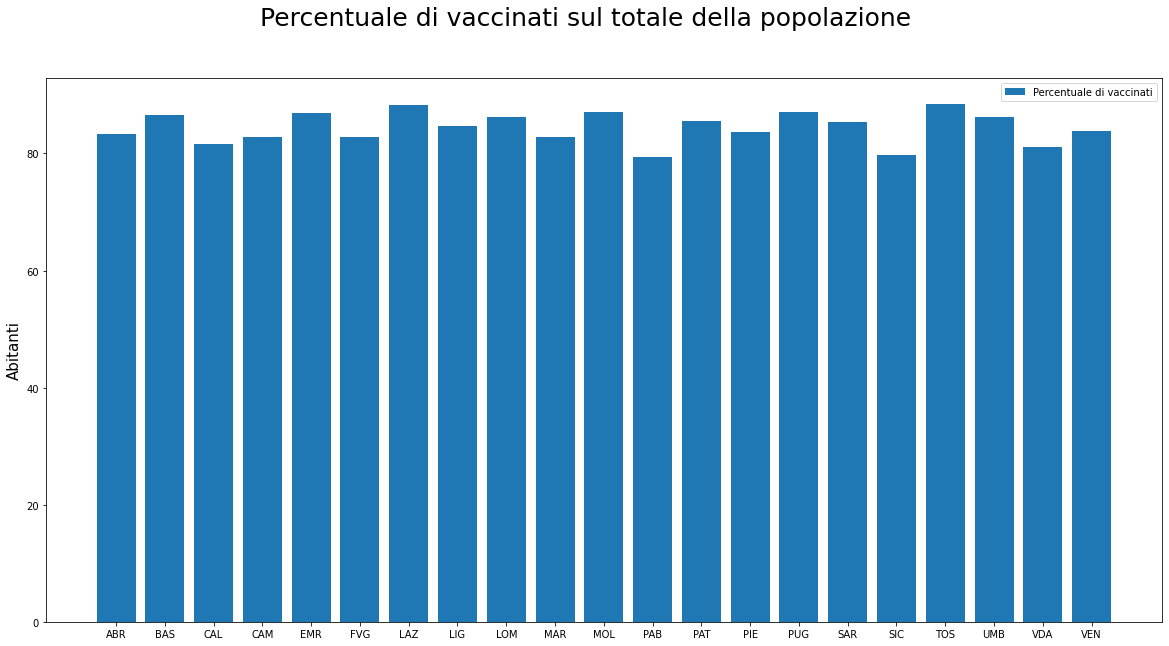

In [118]:
df3 = (df.values / df1.values) * 100
fig = plt.figure(figsize=(20,10))
ax = plt.axes()
ax.bar(df.index, df3, label = "Percentuale di vaccinati")

ax.set_ylabel("Abitanti", fontsize = 15)
fig.suptitle("Percentuale di vaccinati sul totale della popolazione", fontsize = 25)
ax.legend(loc=0)
plt.show()